In [87]:
# url : 
# https://towardsdatascience.com/airbnb-price-prediction-using-linear-regression-scikit-learn-and-statsmodels-6e1fc2bd51a6
# https://www.kaggle.com/code/michalashkenazi/paris-airbnb-prices-prediction-xgboost

# Installation des packages

In [88]:
# %pip install -r requirements.txt

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Exploration des données

In [90]:
folder_path = './data/'

# Lister tous les fichiers CSV
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Ajouter le chemin complet pour chaque fichier
csv_files = [os.path.join(folder_path, f) for f in csv_files]

In [91]:
# Choisir les colonnes à conserver
# On peut se passer du calendar.csv car les informations ne nous intéressent pas
# On se concentre sur listings et reviews pour l'instant
# On peut liée les reviews aux listings via l'ID de l'annonce

# Exclure 'calendar.csv' de la liste
filtered_files = [f for f in csv_files]

print(filtered_files)


['./data/clean_df.csv', './data/listings.csv', './data/listings2.csv']


In [92]:
# Assuming the files are named appropriately, you can filter them like this:
listings_file = [f for f in filtered_files if 'listings' in f][0]

listings = pd.read_csv(listings_file)

In [93]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [94]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240906025355,2024-09-11,city scrape,zen and calm,"Lovely Appartment with one bedroom with a Queen size bed.<br />Calm et bright<br />Sheets and towels furnished<br />4th floor, no elevator",Good restaurants<br />very close the Montparnasse Station<br />15 m from the center of Paris,https://a0.muscache.com/pictures/miso/Hosting-3109/original/50c69430-6385-413b-8a65-f6c022912301.jpeg,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",NaN,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3631/profile_pic/1375800198/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/3631/profile_pic/1375800198/original.jpg?aki_policy=profile_x_medium,Alésia,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Observatoire,NaN,48.83191,2.3187,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ""Iron"", ""Smart lock"", ""Smoke alarm"", ""Dishes and silverware"", ""Washer"", ""Self check-in"", ""Hangers"", ""Wifi"", ""Children\u2019s books and toys"", ""Hot water"", ""Paid parking off premises"", ""Hair dryer"", ""Kitchen""]",$113.00,2,30,2,2,30,30,2.0,30.0,NaN,t,6,20,35,297,2024-09-11,4,0,0,2017-10-28,2019-10-24,5.0,5.0,5.0,5.0,5.0,5.0,5.0,7511409139079,t,1,1,0,0,0.05


In [95]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95461 non-null  int64  
 1   listing_url                                   95461 non-null  object 
 2   scrape_id                                     95461 non-null  int64  
 3   last_scraped                                  95461 non-null  object 
 4   source                                        95461 non-null  object 
 5   name                                          95461 non-null  object 
 6   description                                   91385 non-null  object 
 7   neighborhood_overview                         48179 non-null  object 
 8   picture_url                                   95459 non-null  object 
 9   host_id                                       95461 non-null 

In [96]:
columns_to_choose = [
    'id', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms_text', 
    'amenities', 'price', 'beds','number_of_reviews', 'review_scores_rating', 'bedrooms'
]

df = listings[columns_to_choose]

# Cleaning des données

### 1. Datetime & Float

In [97]:
df = df.dropna()

In [98]:
# Transformer la colonne "price" en float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [99]:
df.isnull().sum()/df.shape[0]*100

id                        0.0
neighbourhood_cleansed    0.0
room_type                 0.0
accommodates              0.0
bathrooms_text            0.0
amenities                 0.0
price                     0.0
beds                      0.0
number_of_reviews         0.0
review_scores_rating      0.0
bedrooms                  0.0
dtype: float64

### 5. Transformer "bath_text" en int

In [100]:
df['bathrooms_text'] = df['bathrooms_text'].str.extract(r'(\d+)').astype(float)

In [101]:
df = df.rename(columns={'bathrooms_text': 'bathrooms'})

In [102]:
print((df['bathrooms'] == 0).sum())
print((df[(df['room_type'].isin(['Shared room', 'Private room'])) & (df['bathrooms'] == 0)].shape[0]))

181
30


In [103]:
df = df[~((df['bathrooms'] == 0) & (~df['room_type'].isin(['Private room', 'Shared room'])))]

In [104]:
df = df.dropna(subset=['bathrooms'])

#### 6. Amenities

In [105]:
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))

df = df.drop('amenities', axis=1)

### 7. Price per Person

In [106]:
price_per_person = df['price']/df['accommodates']

df['price_per_person'] = price_per_person

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45514 entries, 0 to 95456
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      45514 non-null  int64  
 1   neighbourhood_cleansed  45514 non-null  object 
 2   room_type               45514 non-null  object 
 3   accommodates            45514 non-null  int64  
 4   bathrooms               45514 non-null  float64
 5   price                   45514 non-null  float64
 6   beds                    45514 non-null  float64
 7   number_of_reviews       45514 non-null  int64  
 8   review_scores_rating    45514 non-null  float64
 9   bedrooms                45514 non-null  float64
 10  amenities_count         45514 non-null  int64  
 11  price_per_person        45514 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.5+ MB


### 7. Cleaned csv

In [108]:
clean_df_name = "./data/clean_df.csv"

if os.path.exists(clean_df_name):
    os.remove(clean_df_name)

df.to_csv(clean_df_name, index=False)

In [109]:
df = pd.read_csv(clean_df_name)

Number of room types : 4

room_type
Entire home/apt    41123
Private room        3846
Hotel room           369
Shared room          176
Name: count, dtype: int64


C:\Users\Aymane\AppData\Local\Temp\ipykernel_17544\965599796.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "room_type", data = df, kind = "count", palette="Set2")


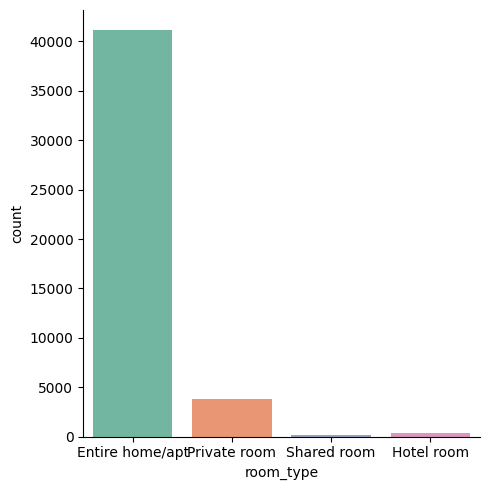

In [110]:
# Number of room types
print("Number of room types :", len(df["room_type"].unique()))
print()

# Number of listings of each room type
print(df["room_type"].value_counts())
sns.catplot(x = "room_type", data = df, kind = "count", palette="Set2")

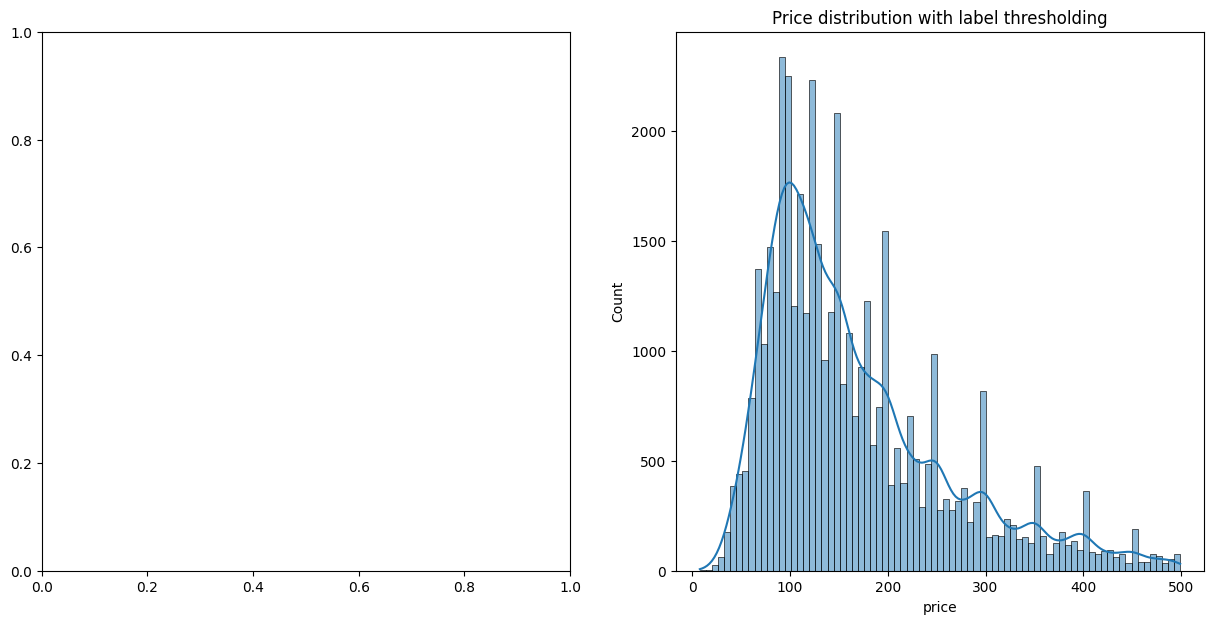

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# sns.histplot(df['price'], kde=True, ax=axes[0])
# axes[0].set_title('Price distribution')

sns.histplot(df['price'][df['price'] < 500], kde=True, ax=axes[1])
axes[1].set_title('Price distribution with label thresholding')

plt.show()

         room_type        mean  median
0  Entire home/apt  218.359215   150.0
1       Hotel room  267.769648   246.0
2     Private room  160.282111   100.0
3      Shared room  102.784091    50.0


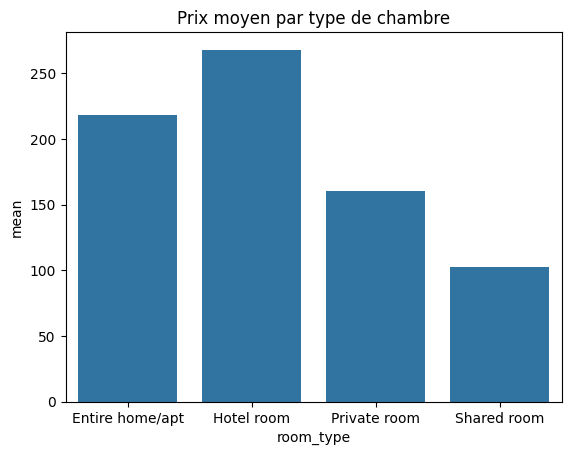

In [112]:
summary = df.groupby('room_type')['price'].agg(['mean', 'median']).reset_index()
print(summary)
sns.barplot(data=summary, x='room_type', y='mean')
plt.title('Prix moyen par type de chambre')
plt.show()

C:\Users\Aymane\AppData\Local\Temp\ipykernel_17544\3300164423.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='neighbourhood_cleansed', y='price', ci=None)


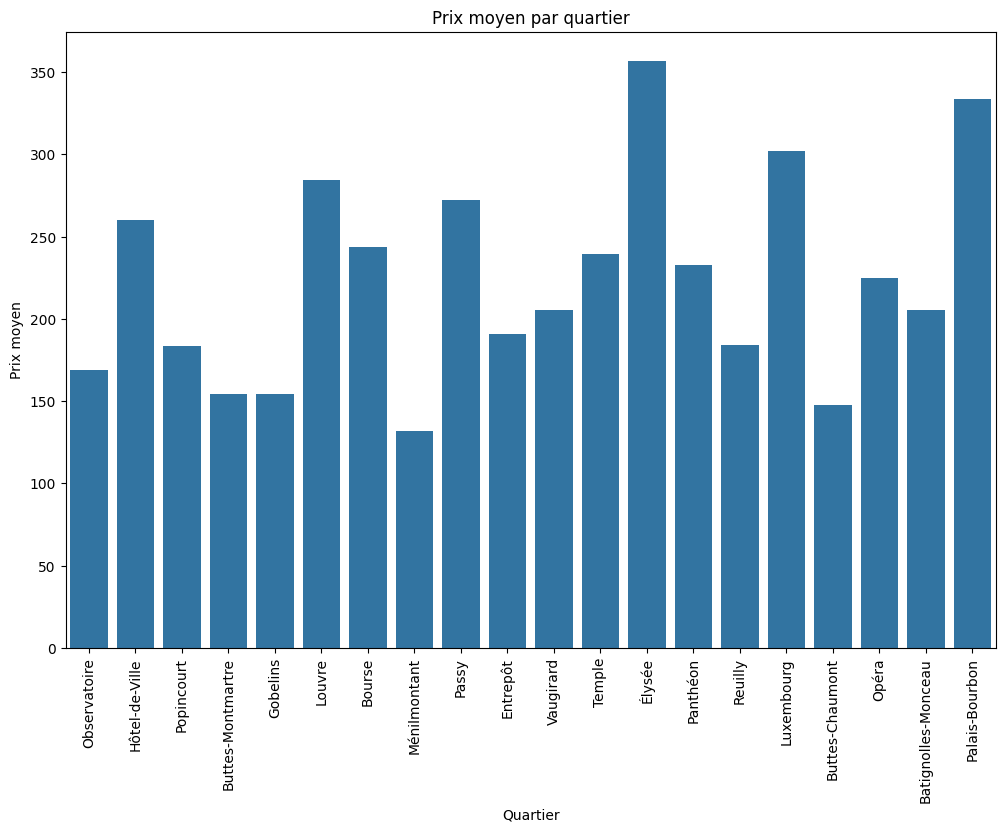

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='neighbourhood_cleansed', y='price', ci=None)
plt.title('Prix moyen par quartier')
plt.xlabel('Quartier')
plt.ylabel('Prix moyen')
plt.xticks(rotation=90)
plt.show()

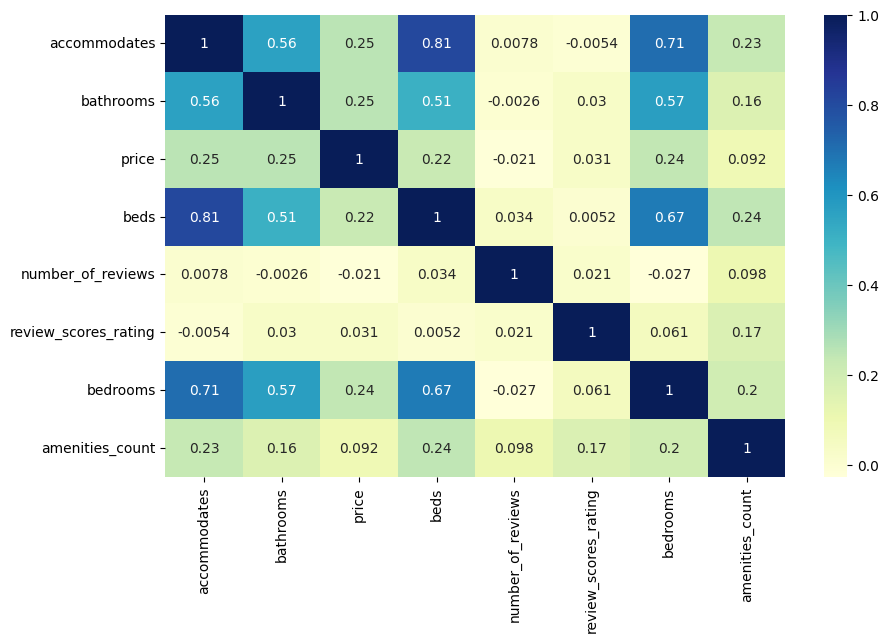

In [114]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['id', 'price_per_person'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [115]:
df.isna().sum()

id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bathrooms                 0
price                     0
beds                      0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
amenities_count           0
price_per_person          0
dtype: int64

<Axes: ylabel='price'>

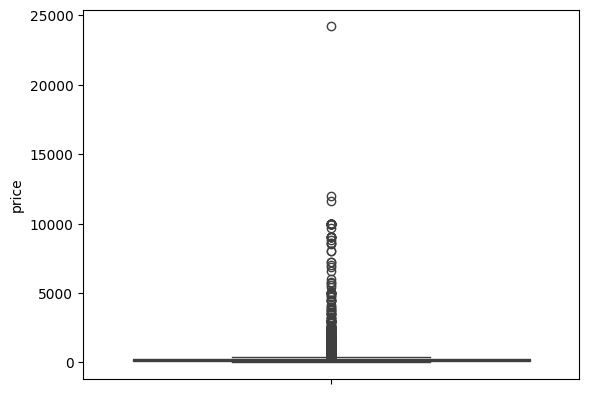

In [116]:
sns.boxplot(y=df['price'])

In [117]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [118]:
df.shape

(42284, 12)

# Modele

### 1. Data test

In [119]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

df_test = pd.read_csv('./data/listings2.csv')

df_test_filtered = df_test[['id','price', 'amenities', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms', 'beds', 'number_of_reviews_ltm', 'review_scores_rating', 'bedrooms']]
# Convert price to a numeric value if it's stored as a string with symbols like '$'
# Count the number of amenities
# Convert price to a numeric value if it's stored as a string with symbols like '$'
df_test_filtered['price'] = df_test_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Count the number of amenities
df_test_filtered['amenities_count'] = df_test_filtered['amenities'].apply(lambda x: len(eval(x)))

# Calculate price per person
df_test_filtered['price_per_person'] = df_test_filtered['price'] / df_test_filtered['accommodates']

# Display the updated DataFrame
df_test_filtered.head()

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Aymane\AppData\Local\Temp\ipykernel_17544\2592730814.py:12: SyntaxWarning: invalid escape sequence '\$'
  df_test_filtered['price'] = df_test_filtered['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Aymane\AppData\Local\Temp\ipykernel_17544\2592730814.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_filtered['price'] = df_test_filtered['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Aymane\AppData\Local\Temp\ipykernel_17544\2592730814.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,id,price,amenities,neighbourhood_cleansed,room_type,accommodates,bathrooms,beds,number_of_reviews_ltm,review_scores_rating,bedrooms,amenities_count,price_per_person
0,80260,NaN,"[""Hangers"", ""Essentials"", ""Wifi"", ""Dishes and silverware"", ""Dedicated workspace"", ""Hair dryer"", ""Kitchen"", ""Shampoo"", ""Pets allowed"", ""Heating""]",Ménilmontant,Entire home/apt,3,NaN,NaN,0,4.63,1.0,10,NaN
1,3109,250.0,"[""Smart lock"", ""Smoke alarm"", ""Cooking basics"", ""Hangers"", ""Wifi"", ""Dishes and silverware"", ""Hair dryer"", ""Children\u2019s books and toys"", ""Kitchen"", ""Washer"", ""Paid parking off premises"", ""Hot water"", ""Luggage dropoff allowed"", ""Self check-in"", ""Iron""]",Observatoire,Entire home/apt,2,1.0,0.0,0,5.00,1.0,15,125.0
2,80301,60.0,"[""Stove"", ""Host greets you"", ""Extra pillows and blankets"", ""TV with standard cable"", ""Refrigerator"", ""Microwave"", ""Washer"", ""Pocket wifi"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Cooking basics"", ""Wifi"", ""Carbon monoxide alarm"", ""Coffee maker"", ""Dishwasher"", ""Hangers"", ""Pack \u2019n play/Travel crib"", ""Dishes and silverware"", ""Kitchen"", ""Oven"", ""Long term stays allowed"", ""Cleaning available during stay"", ""Heating"", ""Hot water"", ""Iron"", ""Smoke alarm"", ""Essentials"", ""Hair dryer"", ""Private patio or balcony"", ""Bed linens""]",Panthéon,Private room,1,1.5,1.0,1,4.83,1.0,30,60.0
3,5396,96.0,"[""Stove"", ""Host greets you"", ""Extra pillows and blankets"", ""TV with standard cable"", ""Refrigerator"", ""Washer"", ""Cooking basics"", ""Wifi"", ""Dedicated workspace"", ""Clothing storage: closet"", ""First aid kit"", ""Cleaning products"", ""Baking sheet"", ""Toaster"", ""Hangers"", ""Dishes and silverware"", ""Coffee"", ""Shower gel"", ""Kitchen"", ""Oven"", ""Long term stays allowed"", ""Heating"", ""Fire extinguisher"", ""Hot water"", ""Iron"", ""Smoke alarm"", ""Hot water kettle"", ""Essentials"", ""Drying rack for clothing"", ""Hair dryer"", ""Shampoo"", ""Coffee maker: espresso machine, pour-over coffee"", ""Portable fans"", ""Body soap"", ""Books and reading material"", ""Bed linens"", ""Wine glasses""]",Hôtel-de-Ville,Entire home/apt,2,1.0,1.0,64,4.61,0.0,37,48.0
4,7397,160.0,"[""Stove"", ""Host greets you"", ""Extra pillows and blankets"", ""TV with standard cable"", ""Refrigerator"", ""Microwave"", ""Paid parking off premises"", ""Cooking basics"", ""Wifi"", ""Dedicated workspace"", ""Free washer \u2013 In unit"", ""Dryer"", ""Coffee maker"", ""Hangers"", ""Dishes and silverware"", ""Kitchen"", ""Oven"", ""Heating"", ""Hot water"", ""Iron"", ""Smoke alarm"", ""Essentials"", ""Hair dryer"", ""Shampoo"", ""Bed linens""]",Hôtel-de-Ville,Entire home/apt,4,1.0,1.0,21,4.73,2.0,25,40.0


## 2. Linear Regression

In [120]:
df = df.drop('id', axis=1)

y = df['price']
X = df.drop(['price'], axis=1)

# Identifier les colonnes numériques et catégoriques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Créer un préprocesseur pour transformer les colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Créer un pipeline avec préprocessing et modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Faire des prédictions
y_pred = pipeline.predict(X_test)

# Évaluer les performances
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 30.383068646628264
MAE: 19.402075279325526
R²: 0.8695348448115462


## 2.1 Linear Regression prediction with test data

In [121]:
# Saisir manuellement une nouvelle donnée pour prédiction
linear_regression_data_manual = pd.DataFrame({
    'neighbourhood_cleansed': ['Observatoire'],
    'room_type': ['Entire home/apt'],
    'accommodates': [2],
    'bathrooms': [1.0],
    'beds': [1.0],
    'number_of_reviews': [0],
    'review_scores_rating': [5.0],
    'bedrooms': [1.0],
    'amenities_count': [14],
    'price_per_person': [125.0]
})

# Faire une prédiction avec la nouvelle donnée
predicted_price_rf = pipeline.predict(linear_regression_data_manual)
print(f"Predicted price with sample 1 : {predicted_price_rf[0]}")

# Saisir manuellement une nouvelle donnée pour prédiction
# 21	4.73	2.0	25	40.0
linear_regression_data_manual = pd.DataFrame({
    'neighbourhood_cleansed': ['Hôtel-de-Ville'],
    'room_type': ['Entire home/apt'],
    'accommodates': [4],
    'bathrooms': [1.0],
    'beds': [1.0],
    'number_of_reviews': [21],
    'review_scores_rating': [4.73],
    'bedrooms': [2.0],
    'amenities_count': [25],
    'price_per_person': [40.0]
})

# Faire une prédiction avec la nouvelle donnée
predicted_price_rf = pipeline.predict(linear_regression_data_manual)
print(f"Predicted price with sample 2: {predicted_price_rf[0]}")

Predicted price with sample 1 : 262.18979547227445
Predicted price with sample 2: 172.624746479461


## 3. Random Forest

In [122]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Modèle Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Pipeline avec le modèle Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Recherche des meilleurs hyperparamètres (Grid Search)
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions
y_pred_rf = best_model.predict(X_test)

# Évaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest RMSE: 1.5211574602647941
Random Forest MAE: 0.1600756769540028
Random Forest R²: 0.9996729760131344


In [ ]:
best_model.get_params()['model']

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=42)

## 3.1 Random Forest prediction with test data

In [124]:
# Définir les variables X (caractéristiques) et y (cible)
y = df['price']
X = df.drop(['price'], axis=1)

# Identifier les colonnes numériques et catégoriques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Créer un préprocesseur pour transformer les colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline avec Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

# Entraîner le modèle
pipeline_rf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = pipeline_rf.predict(X_test)

# Évaluer les performances
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest RMSE: 1.5595020768062369
Random Forest MAE: 0.15700425682866218
Random Forest R²: 0.9996562812843193


In [125]:

# Saisir manuellement une nouvelle donnée pour prédiction
rf_data = pd.DataFrame({
    'neighbourhood_cleansed': ['Observatoire'],
    'room_type': ['Entire home/apt'],
    'accommodates': [2],
    'bathrooms': [1.0],
    'beds': [1.0],
    'number_of_reviews': [0],
    'review_scores_rating': [5.0],
    'bedrooms': [1.0],
    'amenities_count': [14],
    'price_per_person': [125.0]
})

# Faire une prédiction avec la nouvelle donnée
predicted_price_rf = pipeline_rf.predict(rf_data)
print(f"Predicted price with sample 1 : {predicted_price_rf[0]}")

# Saisir manuellement une nouvelle donnée pour prédiction
# 21	4.73	2.0	25	40.0
rf_data = pd.DataFrame({
    'neighbourhood_cleansed': ['Hôtel-de-Ville'],
    'room_type': ['Entire home/apt'],
    'accommodates': [4],
    'bathrooms': [1.0],
    'beds': [1.0],
    'number_of_reviews': [21],
    'review_scores_rating': [4.73],
    'bedrooms': [2.0],
    'amenities_count': [25],
    'price_per_person': [40.0]
})

# Faire une prédiction avec la nouvelle donnée
predicted_price_rf = pipeline_rf.predict(rf_data)
print(f"Predicted price with sample 2: {predicted_price_rf[0]}")

Predicted price with sample 1 : 250.0
Predicted price with sample 2: 160.0


# Auto keras

In [ ]:
# %pip install autokeras


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
# import autokeras as ak

# # Définir les variables X (caractéristiques) et y (cible)
# y = df['price']
# X = df.drop(['price'], axis=1)

# # Diviser les données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

# # Initialiser le modèle de régression AutoKeras
# auto_model = ak.StructuredDataRegressor(max_trials=10, overwrite=True)  # max_trials définit le nombre de modèles testés

# # Entraîner le modèle
# auto_model.fit(X_train, y_train, epochs=10)  # Vous pouvez augmenter les epochs si nécessaire

# # Prédire les valeurs de test
# y_pred = auto_model.predict(X_test).flatten()  # .flatten() pour aplatir les prédictions

# # Évaluer les performances
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")
# print(f"R²: {r2}")

# # Exporter le meilleur modèle trouvé
# best_model = auto_model.export_model()
# best_model.save("best_autokeras_model")